In [1]:
import pandas as pd

# Load the provided data
file_path = r'C:\Users\bluecom011\Desktop\최종본\최종데이터(한글) - 최종데이터(한글).csv'
data = pd.read_csv(file_path, encoding='utf-8')

# Display the first few rows of the dataframe
data.head()


C:\Users\bluecom011\AppData\Local\Temp\ipykernel_23980\2709726924.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,자치구,경도,위도,장애인구수,평균 도로혼잡도,주차장,복지시설,과태료건수,부과액,평균차량빈도,장애인고용자수
0,강동구,127.153334,37.548510,18785,55.9,15517,51,2307,184200000,62.1,310
1,송파구,127.124191,37.497060,20571,52.8,22745,50,4656,409090000,52.1,764
2,강남구,127.075020,37.487902,15158,44.6,20566,56,6135,546904200,56.1,1211
3,서초구,127.039196,37.464048,10158,48.6,14690,30,3257,269840000,54.8,608
4,관악구,126.945904,37.464788,20228,48.6,20446,25,1776,152020000,40.2,235


In [3]:
pip install statsmodels

   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB 1.3 MB/s eta 0:00:08
    --------------------------------------- 0.2/9.8 MB 2.3 MB/s eta 0:00:05
   - -------------------------------------- 0.3/9.8 MB 3.0 MB/s eta 0:00:04
   - -------------------------------------- 0.5/9.8 MB 3.2 MB/s eta 0:00:03
   -- ------------------------------------- 0.6/9.8 MB 3.2 MB/s eta 0:00:03
   --- ------------------------------------ 0.8/9.8 MB 3.4 MB/s eta 0:00:03
   --- ------------------------------------ 0.9/9.8 MB 3.4 MB/s eta 0:00:03
   --- ------------------------------------ 1.0/9.8 MB 3.2 MB/s eta 0:00:03
   ---- ----------------------------------- 1.1/9.8 MB 3.2 MB/s eta 0:00:03
   ----- ---------------------------------- 1.3/9.8 MB 3.2 MB/s eta 0:00:03
   ------ --------------------------------- 1.5/9.8 MB 3.3 MB/s eta 0:00:03
   ------ --------------------------------- 1.6/9.8 MB 3.4 MB/s eta 0:00:03
   ------- --------

c:\Users\bluecom011\miniconda3\envs\OpenAI\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: Glyph 44221 (\N{HANGUL SYLLABLE GYEONG}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
c:\Users\bluecom011\miniconda3\envs\OpenAI\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
c:\Users\bluecom011\miniconda3\envs\OpenAI\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: Glyph 44284 (\N{HANGUL SYLLABLE GWA}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
c:\Users\bluecom011\miniconda3\envs\OpenAI\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: Glyph 53468 (\N{HANGUL SYLLABLE TAE}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
c:\Users\bluecom011\miniconda3\envs\OpenAI\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: Glyph 47308 (\N{HANGUL SYLLABLE RYO}) missing from current font

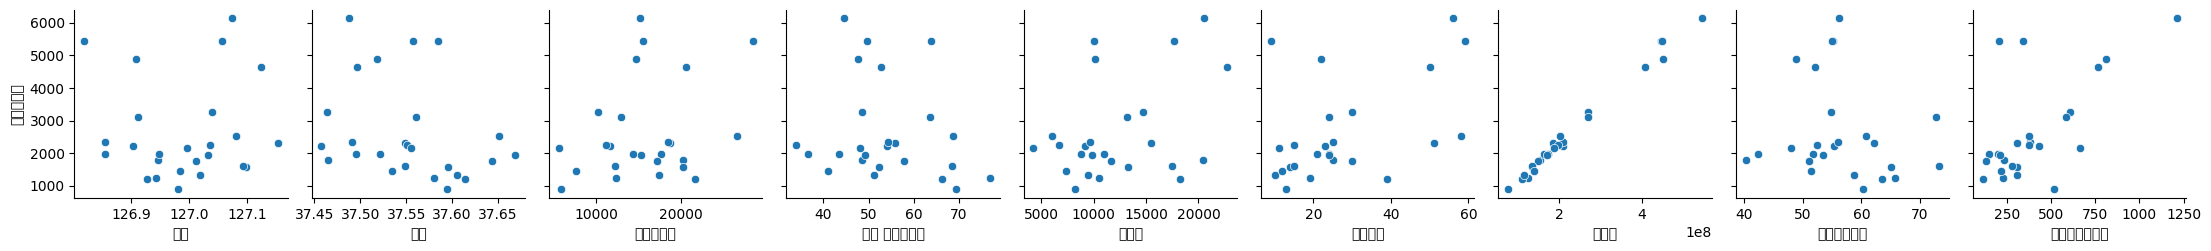

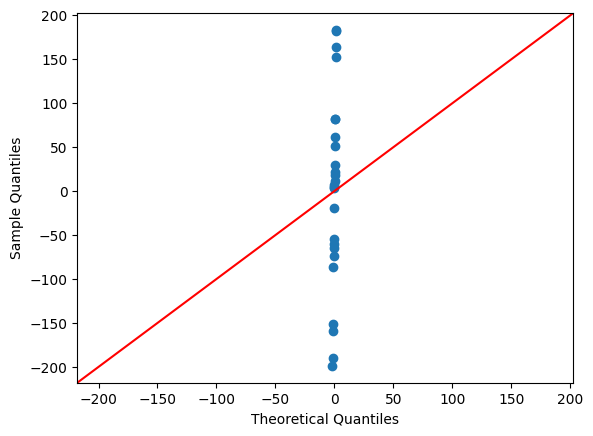

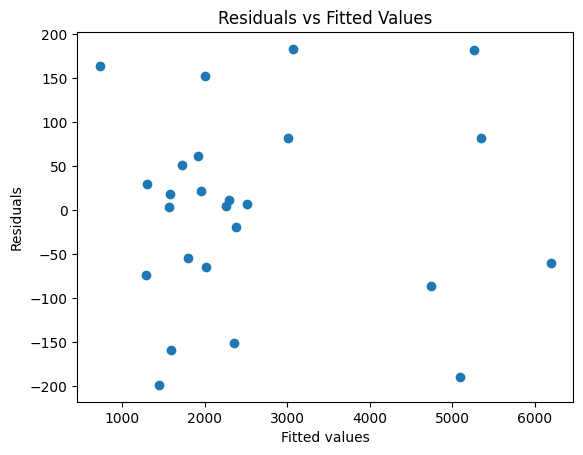

(<class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:                  과태료건수   R-squared:                       0.995
 Model:                            OLS   Adj. R-squared:                  0.991
 Method:                 Least Squares   F-statistic:                     311.3
 Date:                Fri, 26 Jan 2024   Prob (F-statistic):           2.13e-15
 Time:                        10:42:32   Log-Likelihood:                -152.28
 No. Observations:                  25   AIC:                             324.6
 Df Residuals:                      15   BIC:                             336.7
 Df Model:                           9                                         
 Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
 ---------------------------------------------------------------------

In [4]:
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy import stats

# Prepare the data for regression analysis
X = data.drop(['자치구', '과태료건수'], axis=1)  # Removing the '자치구' column and the dependent variable
y = data['과태료건수']

# Add a constant to the independent variables matrix
X_const = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X_const).fit()

# Check for multicollinearity using Variance Inflation Factor (VIF)
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

# Plotting for Linearity
sns.pairplot(data, x_vars=X.columns, y_vars='과태료건수')
plt.show()

# Results summary for checking other assumptions
model_summary = model.summary()

# Durbin-Watson statistic for independence
durbin_watson_stat = sm.stats.stattools.durbin_watson(model.resid)

# Normality of residuals
qq_plot = sm.qqplot(model.resid, line ='45')
plt.show()
shapiro_test = stats.shapiro(model.resid)

# Homoscedasticity (Equal Variance)
plt.scatter(model.fittedvalues, model.resid)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()

# Display the model summary and VIF
model_summary, vif_data, durbin_watson_stat, shapiro_test

